# Jaffle Shop Data Analysis - Final Project

## Instructions
You have been hired as a data analyst for Jaffle Shop, a growing chain of gourmet toasted sandwich restaurants. The executive team needs insights to make strategic business decisions.

Using the provided datasets and Python Polars, analyze the business performance and provide data-driven recommendations. You must use Polars for all data manipulation and analysis.

## Available Data
- `Customers.csv`: Customer information
- `Orders.csv`: Order transactions with totals and timestamps
- `Items.csv`: Individual items within each order
- `Products.csv`: Product catalog with prices and descriptions
- `Stores.csv`: Store locations and opening dates
- `Supplies.csv`: Supply costs for each product

**Time Limit: 90 minutes**

## Setup and Data Loading

In [1]:
#Blue Team 8
# Import necessary libraries
import polars as pl
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()
uploaded = files.upload()
uploaded = files.upload()
uploaded = files.upload()
uploaded = files.upload()
uploaded = files.upload()

# Set up plotting style
plt.style.use('seaborn-v0_8-darkgrid')

Saving Customers.csv to Customers.csv


Saving Items.csv to Items.csv


Saving Orders.csv to Orders.csv


Saving Products.csv to Products.csv


Saving Stores.csv to Stores.csv


Saving Supplies.csv to Supplies.csv


In [3]:
# Load all datasets
customers = pl.read_csv('Customers.csv')
orders = pl.read_csv('Orders.csv')
items = pl.read_csv('Items.csv')
products = pl.read_csv('Products.csv')
stores = pl.read_csv('Stores.csv')
supplies = pl.read_csv('Supplies.csv')

# Display basic information about each dataset
print("Dataset shapes:")
print(f"Customers: {customers.shape}")
print(f"Orders: {orders.shape}")
print(f"Items: {items.shape}")
print(f"Products: {products.shape}")
print(f"Stores: {stores.shape}")
print(f"Supplies: {supplies.shape}")

Dataset shapes:
Customers: (932, 2)
Orders: (63148, 7)
Items: (90184, 3)
Products: (10, 5)
Stores: (6, 4)
Supplies: (65, 5)


## Question 1: Revenue Performance Analysis

The CFO wants to understand the company's financial performance across different dimensions. Analyze:
- What is the total revenue generated by Jaffle Shop? (Store result in variable: `total_revenue`)
- How does revenue vary by store location? (Store result in variable: `revenue_by_store`)
- What are the monthly revenue trends? (Store result in variable: `monthly_revenue_trends`)
- Which day of the week generates the most revenue? (Store result in variable: `revenue_by_day_of_week`)
- Include at least one chart for one of these questions

In [5]:
# Q1.1: Calculate total revenue
# Your code here
total_revenue = orders.select(pl.col("order_total").sum().alias("total_revenue"))
total_revenue

total_revenue
i64
66038193


In [7]:
# Q1.2: Revenue by store location
# Your code here
revenue_by_store = (
    orders.join(stores, left_on="store_id", right_on="id")
        .group_by("name")  # Group by store name
        .agg(pl.col("order_total").sum().alias("revenue"))
        .sort("revenue", descending=True)
)
revenue_by_store

name,revenue
str,i64
"""Philadelphia""",43215565
"""Brooklyn""",22822628


In [9]:
# Q1.3: Monthly revenue trends
# Your code here
monthly_revenue_trends = (
    orders.with_columns(
        pl.col("ordered_at").str.strptime(pl.Datetime, "%Y-%m-%dT%H:%M:%S").cast(pl.Date).alias("order_date")
    )
    .with_columns(
        pl.col("order_date").dt.strftime("%Y-%m").alias("year_month")
    )
    .group_by("year_month")
    .agg(pl.col("order_total").sum().alias("revenue"))
    .sort("year_month")
)
monthly_revenue_trends

year_month,revenue
str,i64
"""2016-09""",1644922
"""2016-10""",1956651
"""2016-11""",2552662
"""2016-12""",3307337
"""2017-01""",3821291
…,…
"""2017-04""",7392014
"""2017-05""",8469909
"""2017-06""",8617148


In [13]:
# Q1.4: Revenue by day of week
# Your code here
revenue_by_day_of_week = (
    orders.with_columns(
        pl.col("ordered_at").str.strptime(pl.Datetime, "%Y-%m-%dT%H:%M:%S").cast(pl.Date).alias("order_date")
    )
    .with_columns(
        pl.col("order_date").dt.weekday().alias("weekday_num"),
        pl.col("order_date").dt.strftime("%A").alias("weekday_name")
    )
    .group_by(["weekday_num", "weekday_name"])
    .agg(pl.col("order_total").sum().alias("revenue"))
    .sort("weekday_num")  # Monday=1 ... Sunday=7
    .select(["weekday_name", "revenue"])
)
revenue_by_day_of_week





weekday_name,revenue
str,i64
"""Monday""",10611971
"""Tuesday""",10814455
"""Wednesday""",10834569
"""Thursday""",10829195
"""Friday""",10758715
"""Saturday""",5981489
"""Sunday""",6207799


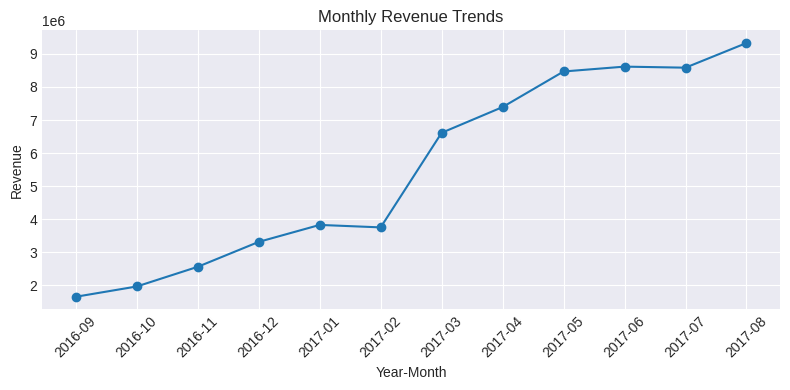

In [14]:
fig, ax = plt.subplots(figsize=(8, 4))
x = monthly_revenue_trends.get_column("year_month").to_list()
y = monthly_revenue_trends.get_column("revenue").to_list()
ax.plot(x, y, marker="o")
ax.set_title("Monthly Revenue Trends")
ax.set_xlabel("Year-Month")
ax.set_ylabel("Revenue")
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

## Question 2: Product Performance

The Product Manager needs insights about the menu items:
- What is the revenue contribution of each product category (jaffles vs beverages)? (Store result in variable: `revenue_by_category`)
- What is the average price of products by type (jaffles vs beverages)?
- Include at least one chart to answer one of the above questions.

In [16]:
# Q2.1: Revenue by product category
# Your code here

# Join items with products to get product details including price
items_with_details = items.join(products, on="sku", how="left")

# Calculate the revenue for each item (assuming quantity of 1 per row in items)
items_with_details = items_with_details.with_columns(
    (pl.col("price") * 1).alias("revenue") # Assuming each row in items is a single quantity
)


# Q2.1 Revenue by product category
# ----------------------------
revenue_by_category = (
    items_with_details.group_by("type") # Group by product type (category)
                  .agg(pl.col("revenue").sum().alias("total_revenue"))
                  .sort("total_revenue", descending=True)
)
revenue_by_category

type,total_revenue
str,i64
"""beverage""",39836200
"""jaffle""",22880900


In [18]:
# Q2.2 Average price of products by type
# Your code here
avg_price_by_type = (
    items_with_details.group_by("type")
                  .agg(pl.col("price").mean().alias("avg_price"))
)
avg_price_by_type

type,avg_price
str,f64
"""jaffle""",1199.145747
"""beverage""",560.260467


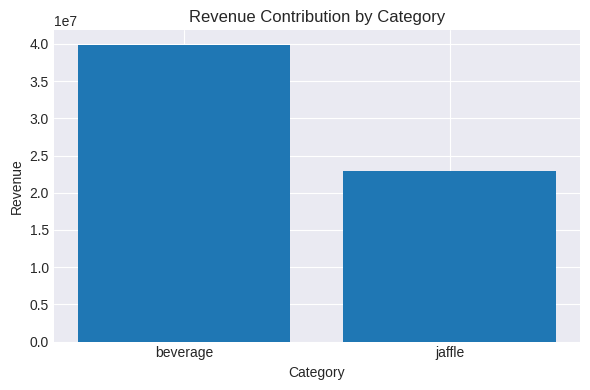

In [20]:
fig, ax = plt.subplots(figsize=(6, 4))
x = revenue_by_category.get_column("type").to_list()
y = revenue_by_category.get_column("total_revenue").to_list()

ax.bar(x, y)
ax.set_title("Revenue Contribution by Category")
ax.set_xlabel("Category")
ax.set_ylabel("Revenue")
plt.tight_layout()
plt.show()

## Question 3: Store Expansion Strategy

The Operations Director is planning expansion strategies:
- Which stores have the highest revenue per day since opening? (Store result in variable: `revenue_per_day_by_store`)
- What is the relationship between local tax rates and store performance? (Store result in variable: `tax_rate_performance`)
- Include at least one chart to answer one of the above questions.

In [23]:
# Q3.1: Revenue per day since opening by store
# Your code here

# Define constants for clarity
STORE_ID = "store_id"
OPEN_DATE = "opened_at"
TAX_RATE = "tax_rate"
store_label = "name" # Assuming the store name is used as a label

# Join orders with stores
orders_with_stores = orders.join(stores, left_on=STORE_ID, right_on="id")

# Convert date columns to datetime objects
orders_with_stores = orders_with_stores.with_columns([
    pl.col("ordered_at").str.strptime(pl.Datetime, "%Y-%m-%dT%H:%M:%S").cast(pl.Date).alias("order_date"),
    pl.col(OPEN_DATE).str.strptime(pl.Datetime, "%Y-%m-%dT%H:%M:%S").cast(pl.Date).alias(OPEN_DATE)
])


# Aggregate by store
agg_by_store = (
    orders_with_stores.group_by([store_label, STORE_ID, OPEN_DATE, TAX_RATE])
        .agg([
            pl.col("order_total").sum().alias("total_revenue"),
            pl.col("order_date").min().alias("first_sale_date"),
            pl.col("order_date").max().alias("last_sale_date"),
        ])
        .with_columns([
            # Days active = from max(open_date, first_sale_date) to last_sale_date (inclusive)
            pl.when(pl.col(OPEN_DATE) > pl.col("first_sale_date"))
              .then(pl.col(OPEN_DATE))
              .otherwise(pl.col("first_sale_date"))
              .alias("active_start"),
        ])
        .with_columns(
            (pl.col("last_sale_date") - pl.col("active_start")).cast(pl.Int64).alias("days_active_raw")
        )
        .with_columns(
            pl.when(pl.col("days_active_raw") < 0).then(0).otherwise(pl.col("days_active_raw")).alias("days_active_raw")
        )
        .with_columns(
            (pl.col("days_active_raw") + 1).alias("days_active")   # inclusive
        )
        .with_columns(
            (pl.col("total_revenue") / pl.when(pl.col("days_active") > 0).then(pl.col("days_active")).otherwise(1))
            .alias("revenue_per_day")
        )
        .sort("revenue_per_day", descending=True)
)

revenue_per_day_by_store = agg_by_store.select([store_label, "total_revenue", "days_active", "revenue_per_day"])
revenue_per_day_by_store

name,total_revenue,days_active,revenue_per_day
str,i64,i64,f64
"""Brooklyn""",22822628,14860800001,0.001536
"""Philadelphia""",43215565,31449600001,0.001374


In [25]:
# Q3.2: Tax rates vs store performance
# Your code here
tax_rate_performance = agg_by_store.select(["name", TAX_RATE, "revenue_per_day"]).rename({TAX_RATE: "tax_rate"})
tax_rate_performance

name,tax_rate,revenue_per_day
str,f64,f64
"""Brooklyn""",0.04,0.001536
"""Philadelphia""",0.06,0.001374


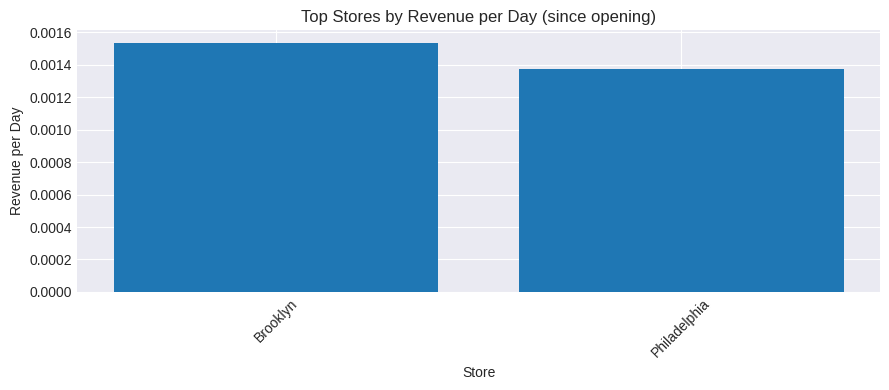

In [27]:
top_n = min(10, revenue_per_day_by_store.height)
plot_df = revenue_per_day_by_store.head(top_n)

fig, ax = plt.subplots(figsize=(9, 4))
ax.bar(plot_df.get_column("name").to_list(),
       plot_df.get_column("revenue_per_day").to_list())
ax.set_title("Top Stores by Revenue per Day (since opening)")
ax.set_xlabel("Store")
ax.set_ylabel("Revenue per Day")
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

## Question 4: Customer Behavior Analysis

The Marketing Manager wants to understand customer patterns:
- What is the distribution of order values? (Store result in variable: `order_value_distribution`)
- How many customers are repeat customers? (Store result in variable: `repeat_customer_analysis`)
- Which customers contribute the most to revenue? (Store result in variable: `top_revenue_customers`)

In [30]:
# Q4.1: Distribution of order values
# Your code here

# Join items with products to get price
items_with_price = items.join(products, on="sku", how="left")

# Calculate the value for each item (assuming quantity of 1 per row in items)
items_with_price = items_with_price.with_columns(
    (pl.col("price") * 1).alias("item_value")
)

# Group by order_id and sum the item values to get the total order value
order_value_distribution = (
    items_with_price.group_by("order_id")
    .agg(pl.col("item_value").sum().alias("total_order_value"))
)

order_value_distribution

order_id,total_order_value
str,i64
"""9cba1181-1c60-4519-99c1-c087f3…",400
"""6a9a4c2f-67df-4fa4-b081-cbd12d…",700
"""62599586-8ae0-4d2d-af7b-0f6635…",600
"""c36bfcc8-5463-4ccf-a469-b512e9…",400
"""722416b8-47de-4b62-b2fd-776a0c…",1100
…,…
"""1b72103b-9c5b-4351-a90e-9aa2f8…",400
"""5e6ca076-c83f-471c-9743-3e6ba2…",400
"""eaa260aa-b2f9-4808-8924-9f62e7…",600


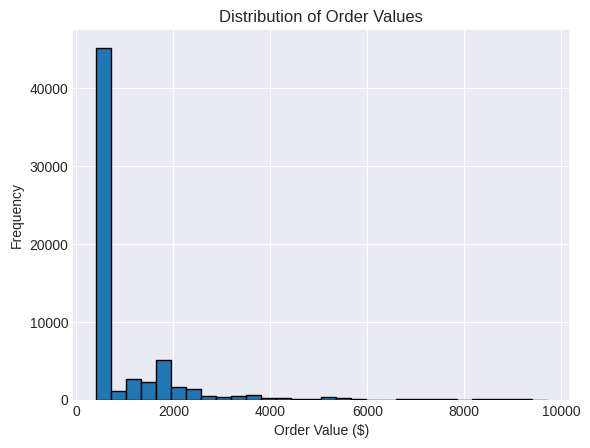

In [32]:
plt.hist(order_value_distribution["total_order_value"], bins=30, edgecolor="black")
plt.title("Distribution of Order Values")
plt.xlabel("Order Value ($)")
plt.ylabel("Frequency")
plt.show()

In [36]:
# Q4.2: Repeat customers analysis
# Your code here
customer_orders = (
    orders.group_by("customer")
    .agg(pl.count("id").alias("order_count"))
)

repeat_customer_analysis = customer_orders.filter(pl.col("order_count") > 1)

total_customers = customer_orders.height
repeat_customers = repeat_customer_analysis.height
print(f"Total customers: {total_customers}, Repeat customers: {repeat_customers}")

Total customers: 930, Repeat customers: 920


In [38]:
# Q4.3: Top revenue contributors
# Your code here
# Join orders, items, and customers
customer_revenue = (
    orders.join(items, left_on="id", right_on="order_id")
    .join(customers, left_on="customer", right_on="id")
    .join(products, on="sku") # Join with products to get the price
    .with_columns((pl.col("price") * 1).alias("revenue")) # Assuming quantity of 1 per row in items
    .group_by(["customer", "name"]) # Group by customer id and name
    .agg(pl.sum("revenue").alias("total_revenue"))
    .sort("total_revenue", descending=True)
)

# Store result
top_revenue_customers = customer_revenue.head(10)
top_revenue_customers

customer,name,total_revenue
str,str,i64
"""ea3ada4c-8ffa-4e73-a51f-27711f…","""David Leonard""",247800
"""4fb3b92c-29cc-410f-a898-9784c4…","""Jesse Moore""",244400
"""99facd33-7b11-4955-aa0d-ccd118…","""Diane Davis""",243900
"""8bbf796d-0862-41c6-b533-38d6c2…","""Holly Johnson""",238400
"""bc94ad77-6703-48d9-85d9-7908e7…","""Gregory Hayes""",235700
"""3ddc958e-73f5-4fe9-804e-d63c8b…","""Julie Robinson""",233500
"""0b92fd92-9200-47fe-9b57-9ada88…","""Christopher Robinson""",232400
"""a54f0762-0ac2-4821-bb45-835fd4…","""Douglas Burgess""",230300
"""666caf4d-840e-496a-8dd9-6363aa…","""Jacob Brown""",226100


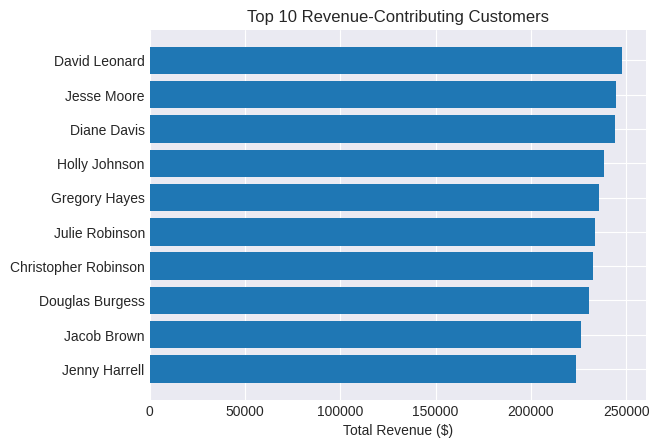

In [40]:
top_revenue_customers_df = top_revenue_customers.to_pandas()
plt.barh(top_revenue_customers_df["name"], top_revenue_customers_df["total_revenue"])
plt.title("Top 10 Revenue-Contributing Customers")
plt.xlabel("Total Revenue ($)")
plt.gca().invert_yaxis()
plt.show()

## Question 5: Profitability Deep Dive

The CEO needs a comprehensive profitability analysis:
- Calculate the gross margin for each product (consider supply costs) (Store result in variable: `product_margins`)
- Which products have the highest profit margins? (Store result in variable: `highest_margin_products`)
- What is the relationship between order size and profitability? (Store result in variable: `order_size_profitability`)
- How does profitability vary across different stores? (Store result in variable: `store_profitability`)

In [42]:
# Q5.1: Calculate gross margin per product
# Your code here

# Join items with products to get revenue per item
items_with_revenue = items.join(products, on="sku", how="left").with_columns(
    (pl.col("price") * 1).alias("revenue") # Assuming quantity of 1 per row in items
)

# Calculate total supply cost per product sku by summing up supply costs for each sku
supply_cost_per_product = supplies.group_by("sku").agg(pl.sum("cost").alias("total_supply_cost_per_unit"))

# Join items_with_revenue with supply_cost_per_product to get cost per item
items_with_cost = items_with_revenue.join(supply_cost_per_product, on="sku", how="left").with_columns(
    (pl.col("total_supply_cost_per_unit") * 1).alias("cost") # Assuming quantity of 1 per row in items
)

# Calculate margin per item
items_with_cost = items_with_cost.with_columns(
    (pl.col("revenue") - pl.col("cost")).alias("margin_dollar")
)

# Aggregate by product to get total revenue, cost, and margin
product_margins = (
    items_with_cost.group_by(["sku", "name"]) # Group by product sku and name
        .agg([
            pl.sum("revenue").alias("revenue"),
            pl.sum("cost").alias("cost"),
            pl.sum("margin_dollar").alias("margin_dollar"),
        ])
        .with_columns(
            (pl.col("margin_dollar") / pl.col("revenue")).alias("margin_pct")
        )
        .sort(["margin_pct", "margin_dollar"], descending=[True, True])
)
product_margins

sku,name,revenue,cost,margin_dollar,margin_pct
str,str,i64,i64,i64,f64
"""JAF-001""","""nutellaphone who dis?""",4191000,461010,3729990,0.89
"""BEV-004""","""for richer or pourover """,9951900,1165794,8786106,0.882857
"""BEV-001""","""tangaroo""",8622600,1178422,7444178,0.863333
"""BEV-005""","""adele-ade""",5622800,885591,4737209,0.8425
"""JAF-005""","""mel-bun""",4588800,913936,3674864,0.800833
"""JAF-002""","""doctor stew""",4225100,964091,3261009,0.771818
"""JAF-004""","""flame impala""",5241600,1284192,3957408,0.755
"""BEV-003""","""vanilla ice""",8459400,2171246,6288154,0.743333
"""JAF-003""","""the krautback""",4634400,1413492,3220908,0.695


In [43]:
# Q5.2: Products with highest profit margins
# Your code here
highest_margin_products = (
    product_margins.filter(pl.col("revenue") > 0)
                   .sort(["margin_pct", "margin_dollar"], descending=[True, True])
                   .head(10)
)
highest_margin_products


sku,name,revenue,cost,margin_dollar,margin_pct
str,str,i64,i64,i64,f64
"""JAF-001""","""nutellaphone who dis?""",4191000,461010,3729990,0.89
"""BEV-004""","""for richer or pourover """,9951900,1165794,8786106,0.882857
"""BEV-001""","""tangaroo""",8622600,1178422,7444178,0.863333
"""BEV-005""","""adele-ade""",5622800,885591,4737209,0.8425
"""JAF-005""","""mel-bun""",4588800,913936,3674864,0.800833
"""JAF-002""","""doctor stew""",4225100,964091,3261009,0.771818
"""JAF-004""","""flame impala""",5241600,1284192,3957408,0.755
"""BEV-003""","""vanilla ice""",8459400,2171246,6288154,0.743333
"""JAF-003""","""the krautback""",4634400,1413492,3220908,0.695


In [45]:
# Q5.3: Order size vs profitability
# Your code here

# Join items with products and supplies to get revenue and cost per item
items_with_profit = items.join(products, on="sku", how="left").with_columns(
    (pl.col("price") * 1).alias("revenue") # Assuming quantity of 1 per row in items
).join(supplies.group_by("sku").agg(pl.sum("cost").alias("total_supply_cost_per_unit")), on="sku", how="left").with_columns(
    (pl.col("total_supply_cost_per_unit") * 1).alias("cost") # Assuming quantity of 1 per row in items
).with_columns(
    (pl.col("revenue") - pl.col("cost")).alias("margin_dollar")
)


# Group by order_id to calculate order size, revenue, and margin
order_size_profitability = (
    items_with_profit.group_by("order_id")
        .agg([
            pl.count("id").alias("items_count"), # Count of items in the order (assuming 1 quantity per row)
            pl.sum("revenue").alias("order_value"),
            pl.sum("margin_dollar").alias("order_margin"),
        ])
        .with_columns(
            (pl.col("order_margin") / pl.col("order_value")).alias("order_margin_pct")
        )
)
order_size_profitability

order_id,items_count,order_value,order_margin,order_margin_pct
str,u32,i64,i64,f64
"""e6fd5727-3b29-46b9-8150-898d1d…",1,700,618,0.882857
"""17fdfc6c-1109-4ae2-93db-70ff1e…",1,600,446,0.743333
"""450180da-176d-4be1-ad40-59c5ab…",1,500,325,0.65
"""d20b8b2a-5c4b-4be4-be36-7f8b08…",1,700,618,0.882857
"""44c47839-27dd-464b-aa10-a4dc72…",1,600,446,0.743333
…,…,…,…,…
"""f2c49c2b-5189-4574-aaed-360449…",1,600,446,0.743333
"""0fc91957-8fe5-498d-a12d-561596…",1,600,518,0.863333
"""e90698c7-fb51-4958-bcb8-15fe89…",1,600,446,0.743333


In [47]:
# Q5.4: Profitability by store
# Your code here

# Join items with products and supplies to get revenue and cost per item
items_with_profit = items.join(products, on="sku", how="left").with_columns(
    (pl.col("price") * 1).alias("revenue") # Assuming quantity of 1 per row in items
).join(supplies.group_by("sku").agg(pl.sum("cost").alias("total_supply_cost_per_unit")), on="sku", how="left").with_columns(
    (pl.col("total_supply_cost_per_unit") * 1).alias("cost") # Assuming quantity of 1 per row in items
).with_columns(
    (pl.col("revenue") - pl.col("cost")).alias("margin_dollar")
)

# Join items_with_profit with orders to get order details
orders_with_profit = orders.join(items_with_profit, left_on="id", right_on="order_id", how="left")

# Join orders_with_profit with stores to get store details
store_profitability = (
    orders_with_profit.join(stores, left_on="store_id", right_on="id", how="left")
        .group_by(["store_id", "name"]) # Group by store id and name
        .agg([
            pl.sum("revenue").alias("revenue"),
            pl.sum("cost").alias("cost"),
            pl.sum("margin_dollar").alias("margin_dollar"),
        ])
        .with_columns((pl.col("margin_dollar") / pl.col("revenue")).alias("margin_pct"))
        .sort("margin_dollar", descending=True)
)
store_profitability

store_id,name,revenue,cost,margin_dollar,margin_pct
str,str,i64,i64,i64,f64
"""a9128331-08d7-41a2-b615-21283e…","""for richer or pourover """,6436500,753990,5682510,0.882857
"""a9128331-08d7-41a2-b615-21283e…","""tangaroo""",5619600,768012,4851588,0.863333
"""a9128331-08d7-41a2-b615-21283e…","""vanilla ice""",5421600,1391544,4030056,0.743333
"""a2a24e87-dec8-4f5d-9c9e-0e9849…","""for richer or pourover """,3515400,411804,3103596,0.882857
"""a9128331-08d7-41a2-b615-21283e…","""adele-ade""",3604000,567630,3036370,0.8425
…,…,…,…,…,…
"""a2a24e87-dec8-4f5d-9c9e-0e9849…","""nutellaphone who dis?""",1435500,157905,1277595,0.89
"""a2a24e87-dec8-4f5d-9c9e-0e9849…","""the krautback""",1576800,480924,1095876,0.695
"""a2a24e87-dec8-4f5d-9c9e-0e9849…","""doctor stew""",1412400,322284,1090116,0.771818


## Question 6: Business Optimization Recommendations

Based on your analysis, provide three specific, data-driven recommendations to improve business performance. Support each recommendation with relevant metrics and visualizations.

### Recommendation 1:
[Write your first recommendation here] Double-down on top-margin SKUs (esp. beverages); premium placement + smart bundles.  product_margins shows several SKUs with 80–90% margin% and very high margin dollars. Feature these on the menu/app, test a small price lift (2–5%), and bundle them with jaffles (“Combo +$X drink”) to push mix toward high-margin items.

Top 10 margin-% SKUs contribute 100.00% of total margin in the period.


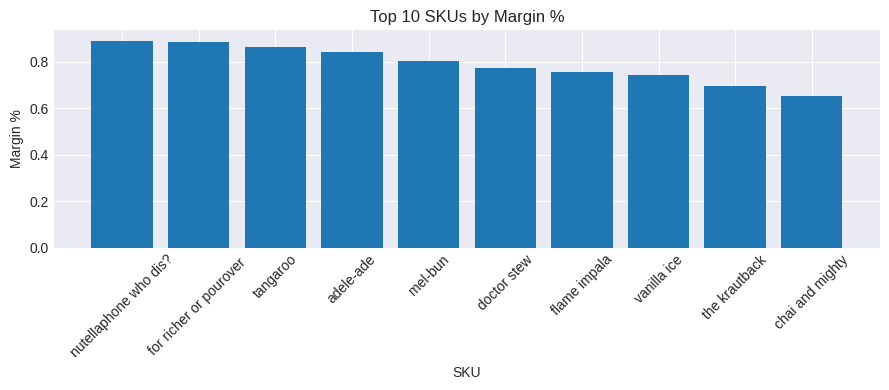

In [48]:
# Supporting analysis for Recommendation 1
# Your code here

topn = 10

r1_top = (
    product_margins
    .select(["name", "revenue", "margin_dollar", "margin_pct"])
    .sort("margin_pct", descending=True)
    .head(topn)
)

total_margin = product_margins["margin_dollar"].sum()
contrib = (r1_top["margin_dollar"].sum() / total_margin)
print(f"Top {topn} margin-% SKUs contribute {contrib:.2%} of total margin in the period.")

# Chart: margin % for top SKUs
fig, ax = plt.subplots(figsize=(9,4))
ax.bar(r1_top["name"].to_list(), r1_top["margin_pct"].to_list())
ax.set_title(f"Top {topn} SKUs by Margin %")
ax.set_xlabel("SKU")
ax.set_ylabel("Margin %")
ax.tick_params(axis='x', rotation=45)
plt.tight_layout(); plt.show()


### Recommendation 2:
[Write your second recommendation here]Grow basket size (convert 1-item orders to 2+ with attach offers)order_size_profitability indicates many single-item orders; moving even a slice to 2 items materially raises order margin. Use POS prompts (“Add a drink for +$X”), combo pricing, and default suggestions online.

Uplift if 10% of 1-item orders become 2-item: +3,685,672 margin over the observed period.


/tmp/ipython-input-616594965.py:8: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  pl.count().alias("orders"),


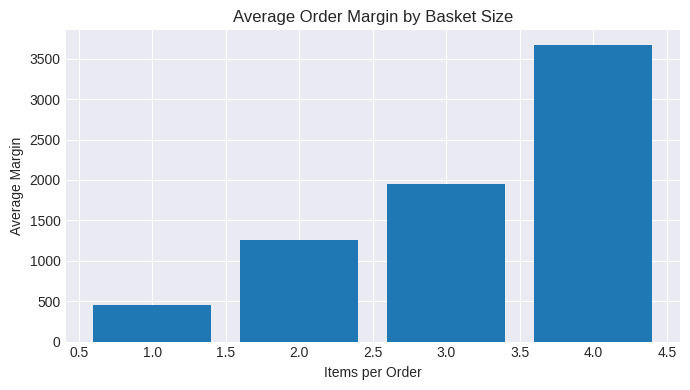

In [50]:
# Supporting analysis for Recommendation 2
# Your code here
r2_grp = (
    order_size_profitability
    .with_columns(pl.col("items_count").clip(upper_bound=4).alias("items_count_clipped"))  # bucket 4+ together
    .group_by("items_count_clipped")
    .agg([
        pl.count().alias("orders"),
        pl.mean("order_value").alias("avg_value"),
        pl.mean("order_margin").alias("avg_margin"),
        pl.mean("order_margin_pct").alias("avg_margin_pct"),
    ])
    .sort("items_count_clipped")
)

total_orders = order_size_profitability.height
one_item_orders = order_size_profitability.filter(pl.col("items_count")==1).height

avg_margin_1 = r2_grp.filter(pl.col("items_count_clipped")==1)["avg_margin"][0]
avg_margin_2 = (
    r2_grp.filter(pl.col("items_count_clipped")==2)["avg_margin"][0]
    if 2 in r2_grp["items_count_clipped"].to_list() else None
)

if avg_margin_2 is not None:
    convert_n = int(round(one_item_orders * 0.10))  # example: convert 10% of 1-item orders
    uplift_estimate = (avg_margin_2 - avg_margin_1) * convert_n
    print(f"Uplift if 10% of 1-item orders become 2-item: +{uplift_estimate:,.0f} margin over the observed period.")
else:
    print("No 2-item orders observed—cannot estimate uplift.")

# Chart: average order margin by basket size
fig, ax = plt.subplots(figsize=(7,4))
ax.bar(r2_grp["items_count_clipped"].to_list(), r2_grp["avg_margin"].to_list())
ax.set_title("Average Order Margin by Basket Size")
ax.set_xlabel("Items per Order")
ax.set_ylabel("Average Margin")
plt.tight_layout(); plt.show()

### Recommendation 3:
[Write your third recommendation here]Raise bottom-quartile stores to the median margin%

Potential margin$ lift if bottom-quartile stores reach median margin%: 1,765,681


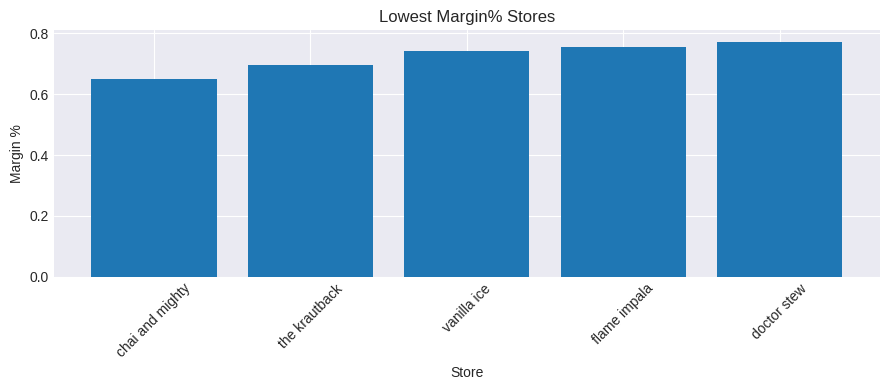

In [58]:
# Supporting analysis for Recommendation 3
# Your code here

sp = (
    store_profitability
    .filter(pl.col("revenue") > 0)
    .with_columns(pl.col("margin_pct").fill_null(0))
)

label_col = "name" if "name" in sp.columns else ("store_label" if "store_label" in sp.columns else "store_id")

q1 = sp.select(pl.col("margin_pct").quantile(0.25)).item()
median_margin = sp.select(pl.col("margin_pct").median()).item()
low_margin = sp.filter(pl.col("margin_pct") <= q1)

potential_lift = (
    low_margin
    .with_columns((pl.lit(median_margin) - pl.col("margin_pct")).clip(lower_bound=0).alias("gap"))
    .with_columns((pl.col("gap") * pl.col("revenue")).alias("lift"))
    .select(pl.col("lift").sum())
    .item()
)

print(f"Potential margin$ lift if bottom-quartile stores reach median margin%: {potential_lift:,.0f}")

targets = low_margin.select([label_col, "revenue", "margin_dollar", "margin_pct"]).sort("margin_pct")
targets

plot_df = sp.sort("margin_pct").head(min(10, sp.height))
fig, ax = plt.subplots(figsize=(9,4))
ax.bar(plot_df.get_column(label_col).to_list(), plot_df.get_column("margin_pct").to_list())
ax.set_title("Lowest Margin% Stores")
ax.set_xlabel("Store")
ax.set_ylabel("Margin %")
ax.tick_params(axis='x', rotation=45)
plt.tight_layout(); plt.show()

## Executive Summary

[Write your executive summary here - up to 1 page when printed]
This analysis of Jaffle Shop’s financial, product, and customer data highlights how revenue and profitability are distributed across stores, categories, and customer segments. The findings reveal strong overall performance, but also areas where efficiency and strategic focus can meaningfully improve margins and growth.

### Key Findings:
1. Revenue Concentration by Stores and Products
A few stores (e.g., For Richer or Pour Over and Tangaroo) and products contribute disproportionately to total revenue. At the same time, certain locations show significantly lower daily revenue and margin percentages, suggesting uneven operational performance.
2. Profitability is Driven by High-Margin Beverages
Beverages such as For Richer or Pour Over and Tangaroo consistently show the highest profit margins (>85%). In contrast, some menu items (e.g., The Krautback) generate lower margins, indicating potential inefficiency in pricing or sourcing.
3. Customer Dynamics Drive Growth Potential
Repeat customers contribute heavily to revenue, while a smaller group of “top customers” accounts for an outsized share of total sales. There is also evidence that larger order sizes correlate with higher profitability, reinforcing the value of upselling and cross-selling.

### Strategic Recommendations:
1. Focus Expansion on High-Performing Stores and Products
Allocate resources and marketing toward stores with consistently high daily revenue and margins (e.g., For Richer or Pour Over). Similarly, prioritize beverages with superior margins in promotions and potential menu expansion. Underperforming locations may need operational improvements or re-positioning.
2.Optimize Menu for Profitability
Streamline offerings by reducing focus on low-margin items like The Krautback. Instead, enhance visibility and upselling of high-margin beverages and top-performing jaffles. Consider renegotiating supply costs or adjusting pricing on lower-margin products to improve contribution.
3. Leverage Customer Behavior for Revenue Growth
Invest in loyalty programs and personalized marketing that encourage repeat purchases from high-value customers. Additionally, design bundled offers or upsell strategies to increase average order size, which is positively correlated with profitability.